### Loading Data + Basic Info

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")

In [2]:
train = pd.read_csv("train.csv")
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [3]:
train.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


### Target Variable Distribution

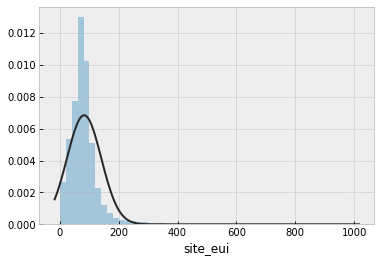

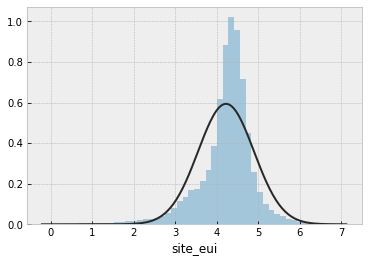

In [4]:
from scipy.stats import norm, lognorm
plt.figure(1)
sns.distplot(train['site_eui'], kde=False, fit=norm)
plt.figure(2)
sns.distplot(np.log(train['site_eui']), kde=False, fit=norm)

### Counts of Missing Variables - so far not doing anything about them

In [5]:
missing_counts = train.isna().sum()
print(missing_counts[missing_counts > 0])
train[missing_counts[missing_counts > 0].index].describe()

year_built                    1837
energy_star_rating           26709
direction_max_wind_speed     41082
direction_peak_wind_speed    41811
max_wind_speed               41082
days_with_fog                45796
dtype: int64


,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,73920.000000,49048.000000,34675.000000,33946.000000,34675.000000,29961.000000
mean,1952.306764,61.048605,66.552675,62.779974,4.190601,109.142051
std,37.053619,28.663683,131.147834,130.308106,6.458789,50.699751
min,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000
25%,1927.000000,40.000000,1.000000,1.000000,1.000000,88.000000
50%,1951.000000,67.000000,1.000000,1.000000,1.000000,104.000000
75%,1977.000000,85.000000,1.000000,1.000000,1.000000,131.000000
max,2015.000000,100.000000,360.000000,360.000000,23.300000,311.000000


### Distributions of Quantitative Variables and Relation to Target Variable

In [6]:
feature_cols = train.drop(["id", "site_eui"], axis=1).columns
quantitative_cols = [c for c in feature_cols if train.dtypes[c] != 'object']

C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Defa

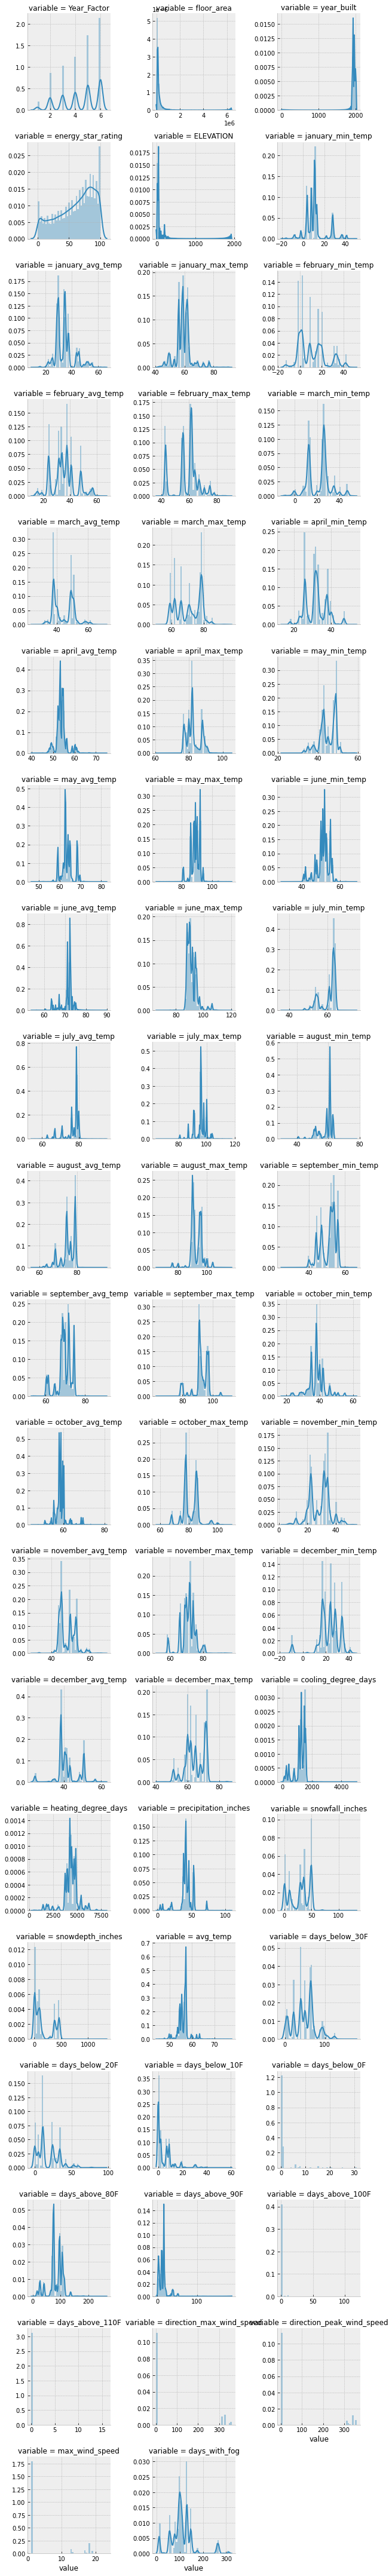

In [7]:
f = pd.melt(train, value_vars=quantitative_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

C:\Users\sahar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


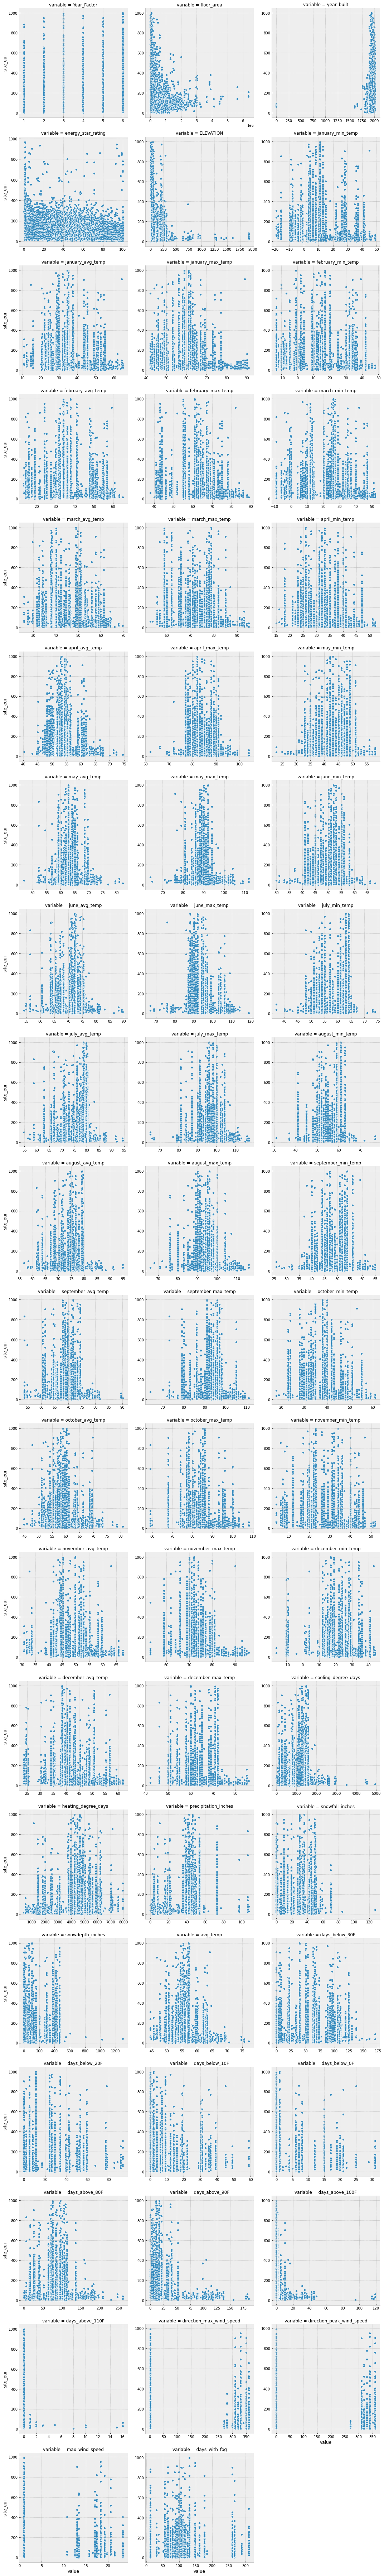

In [8]:
f = pd.melt(train, id_vars=['site_eui'], value_vars=quantitative_cols)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.scatterplot, "value", "site_eui")

### Distributions of Qualitative Variables and Relation to Target Variable

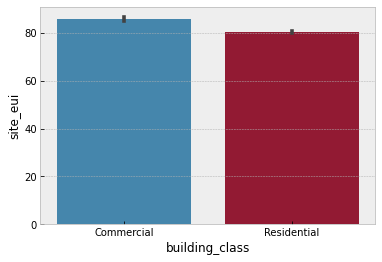

In [9]:
sns.barplot(x="building_class", y="site_eui", data=train)

In [11]:
train.groupby(['building_class', 'facility_type']).mean()['site_eui']

building_class  facility_type                            
Commercial      Commercial_Other                              92.642037
                Commercial_Unknown                           113.151628
                Data_Center                                  339.734876
                Education_College_or_university              108.629116
                Education_Other_classroom                     69.441531
                Education_Preschool_or_daycare                60.974215
                Education_Uncategorized                       46.172799
                Food_Sales                                   136.793222
                Food_Service_Other                            29.236616
                Food_Service_Restaurant_or_cafeteria         195.593925
                Food_Service_Uncategorized                   128.801496
                Grocery_store_or_food_market                 241.135162
                Health_Care_Inpatient                        248.340597
      

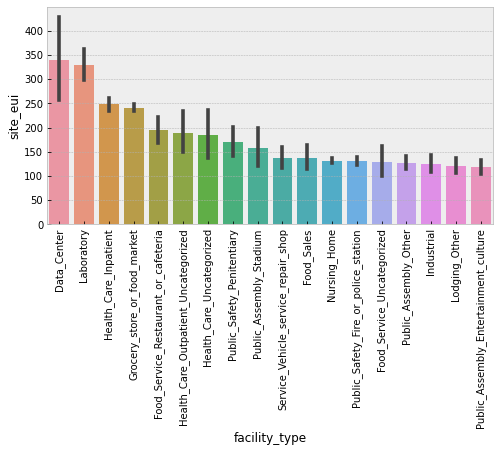

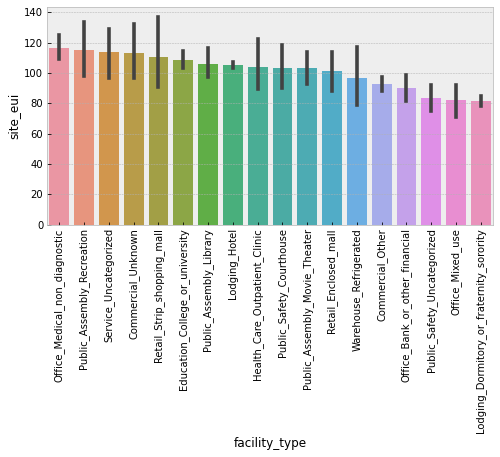

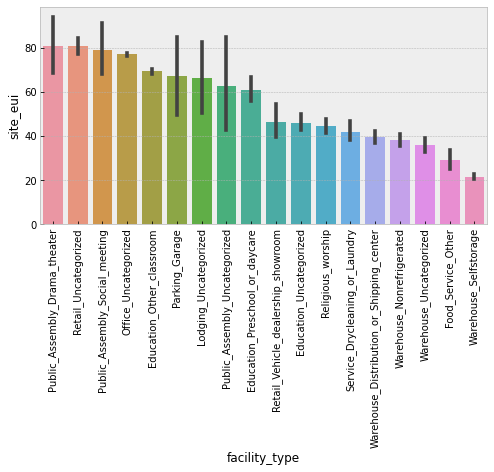

In [40]:
commercial = train[train["building_class"] == "Commercial"]
facility_types = commercial.groupby('facility_type')['site_eui'].mean().sort_values(ascending=False).index.values
num_per_div = len(facility_types)//3
for i in range(3):
    plt.figure(figsize=(8, 4))
    sns.barplot(x="facility_type", y="site_eui", data=commercial, order=facility_types[i*num_per_div : (i+1)*num_per_div])
    plt.xticks(rotation = 90)
    plt.show()

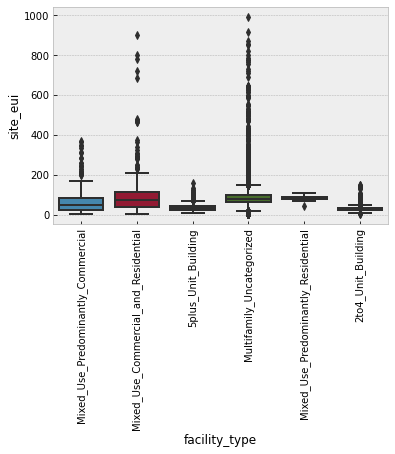

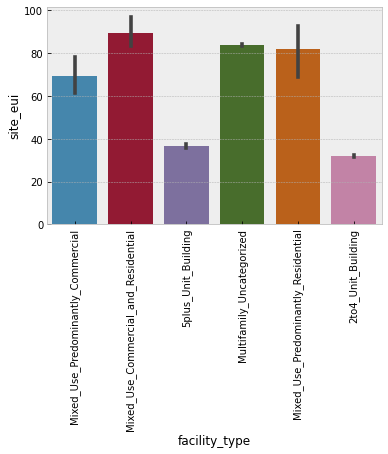

In [25]:
plt.figure(1)
residential = train[train["building_class"] == "Residential"]
sns.boxplot(x="facility_type", y="site_eui", data=residential)
plt.xticks(rotation = 90)
plt.show()
plt.figure(2)
sns.barplot(x="facility_type", y="site_eui", data=residential)
plt.xticks(rotation = 90)
plt.show()

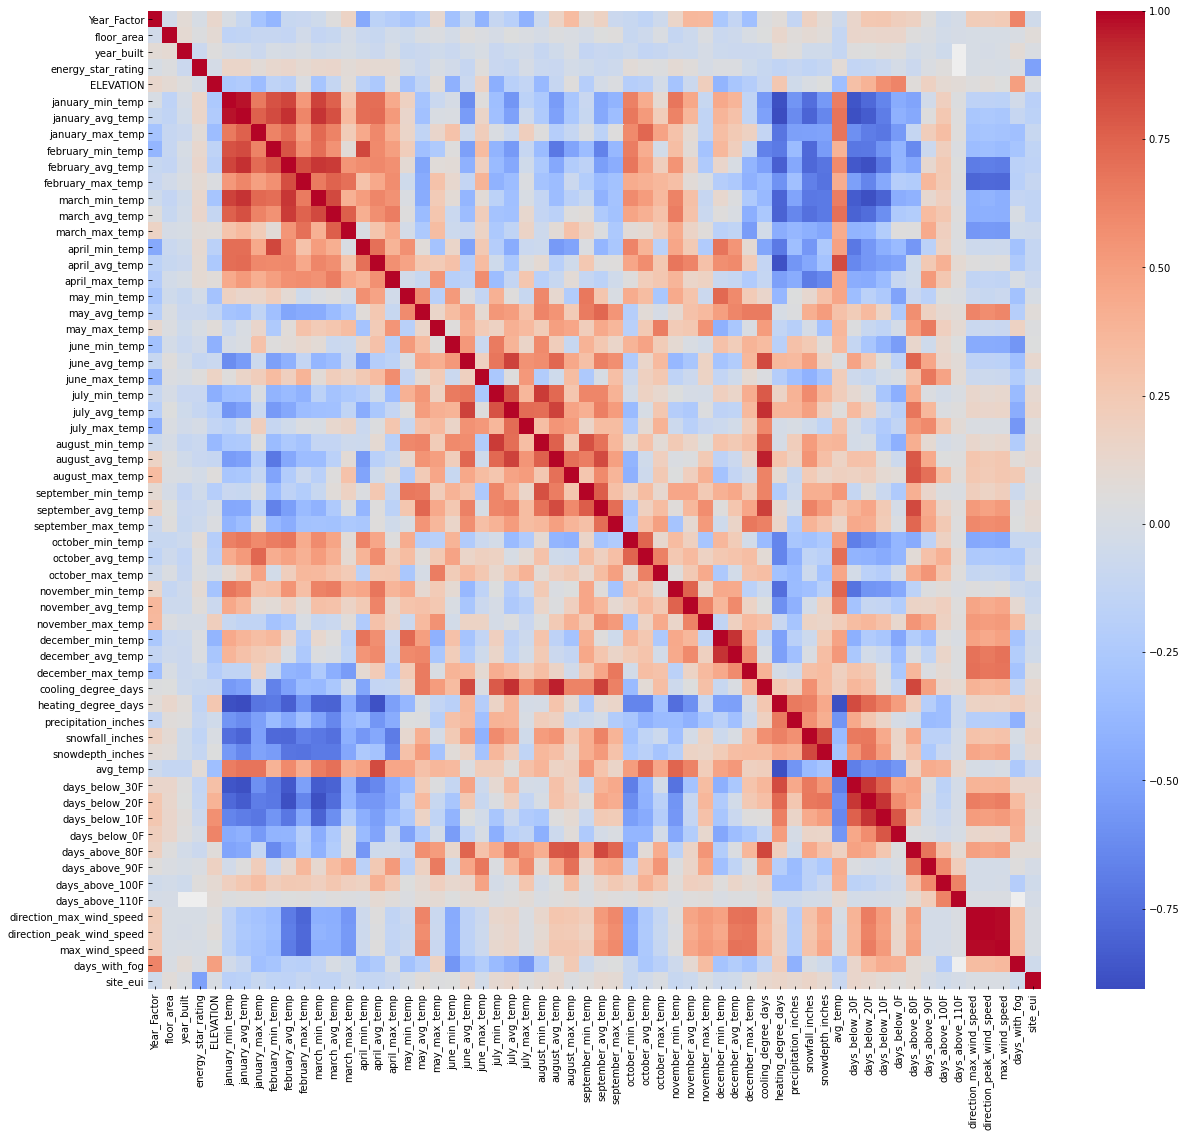

In [41]:
plt.figure(1, figsize=(20, 18))
corr = train[quantitative_cols+['site_eui']].corr()
sns.heatmap(corr, cmap="coolwarm")

In [42]:
print("Extremely high correlations")
for col1 in corr:
    for col2 in corr[col1].index:
        if corr[col1][col2] > 0.8 and col1 != col2:
            print(f"{col1}, {col2}: {corr[col1][col2]}")

Extremely high correlations
january_min_temp, january_avg_temp: 0.9711487497745734
january_min_temp, february_min_temp: 0.8125906770311864
january_min_temp, february_avg_temp: 0.8572219310861277
january_min_temp, march_min_temp: 0.8632387898549488
january_avg_temp, january_min_temp: 0.9711487497745734
january_avg_temp, february_min_temp: 0.8302359673125651
january_avg_temp, february_avg_temp: 0.9112279342549994
january_avg_temp, march_min_temp: 0.9075872749918168
january_avg_temp, march_avg_temp: 0.8188999595118066
february_min_temp, january_min_temp: 0.8125906770311864
february_min_temp, january_avg_temp: 0.8302359673125651
february_min_temp, february_avg_temp: 0.8037052102848617
february_min_temp, april_min_temp: 0.8486358474258635
february_avg_temp, january_min_temp: 0.8572219310861277
february_avg_temp, january_avg_temp: 0.9112279342549994
february_avg_temp, february_min_temp: 0.8037052102848617
february_avg_temp, february_max_temp: 0.8223619833061732
february_avg_temp, march_min_t

In [43]:
criter1 = (train["direction_max_wind_speed"] != train["direction_peak_wind_speed"])
criter2 = train["direction_max_wind_speed"].notna()
criter3 = train["direction_peak_wind_speed"].notna()
train[criter1 & criter2 & criter3]

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
1232,3,State_1,Commercial,Education_Uncategorized,35531.0,NaN,NaN,1.8,25,44.774194,...,126,39,13,0,300.0,320.0,19.7,126.0,47.985545,1232
1233,3,State_1,Commercial,Education_Uncategorized,57474.0,NaN,NaN,1.8,25,44.774194,...,126,39,13,0,300.0,320.0,19.7,126.0,39.936214,1233
1234,3,State_1,Commercial,Education_Uncategorized,123577.0,NaN,NaN,1.8,25,44.774194,...,126,39,13,0,300.0,320.0,19.7,126.0,35.868139,1234
3541,5,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,29.0,1.8,29,51.387097,...,136,52,10,0,280.0,330.0,17.0,113.0,248.782837,3541
3542,5,State_1,Commercial,Office_Uncategorized,27750.0,1963.0,20.0,1.8,29,51.387097,...,136,52,10,0,280.0,330.0,17.0,113.0,92.400000,3542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67307,5,State_8,Commercial,Education_Other_classroom,66000.0,1923.0,57.0,3.0,3,24.016129,...,95,6,0,0,320.0,360.0,23.3,125.0,82.125008,67307
69337,5,State_10,Commercial,Office_Uncategorized,394087.0,1957.0,NaN,3.0,12,35.596774,...,126,41,0,0,360.0,330.0,19.2,114.0,67.799613,69337
69338,5,State_10,Commercial,Office_Uncategorized,213067.0,1969.0,88.0,3.0,12,35.596774,...,126,41,0,0,360.0,330.0,19.2,114.0,46.684623,69338
69339,5,State_10,Commercial,Office_Uncategorized,335991.0,1984.0,83.0,3.0,12,35.596774,...,126,41,0,0,360.0,330.0,19.2,114.0,63.846785,69339


In [44]:
def strip_state(string):
    # convert State_X to X
    return int(string.lstrip("State_"))
train["State_Factor"] = train["State_Factor"].apply(strip_state)
train["building_class"] = train["building_class"].apply(lambda x: 1 if x == "Residential" else 0)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
features = train.drop(["site_eui", "id", "facility_type"], axis=1)
target = train["site_eui"]
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size = 0.2)

In [47]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [48]:
estimator = xgb.XGBRegressor(objective ='reg:squarederror')
xgboost_params = {
    "max_depth": [3, 4, 5, 6],
    "alpha": [0.01, 0.1, 1, 10],
    "learning_rate": [0.1, 0.2, 0.3, 0.4, 0.5],
    "n_estimators": [50, 100, 150, 200]
}



In [49]:
grid_search = RandomizedSearchCV(estimator, xgboost_params, n_jobs = 10, cv = 5, verbose=True, n_iter = 10)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:  4.3min


In [ ]:
best_xgb = grid_search.best_estimator_

In [ ]:
preds = best_xgb.predict(X_val)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, preds, squared=False)

In [ ]:
test = pd.read_csv('test.csv')
test["State_Factor"] = test["State_Factor"].apply(strip_state)
test["building_class"] = test["building_class"].apply(lambda x: 1 if x == "Residential" else 0)

In [ ]:
X_test = test.drop(["id", "facility_type"], axis=1)
test_preds = best_xgb.predict(X_test)
test["site_eui"] = test_preds

In [ ]:
test = test[["id", "site_eui"]]

In [ ]:
test.to_csv("baseline_submission.csv", index=None)